**Task 1**

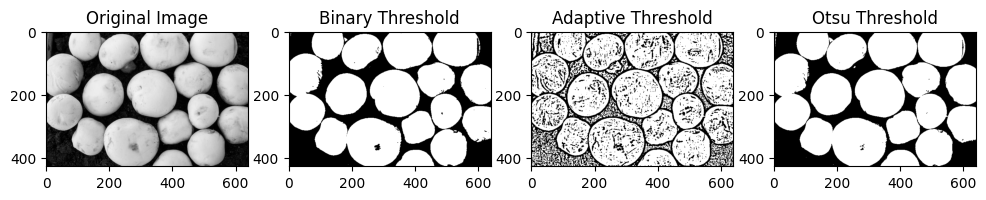

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '../images/1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

_, binary_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY, 11, 2)
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig, ax = plt.subplots(1, 4, figsize=(12, 8))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(binary_thresh, cmap='gray')
ax[1].set_title('Binary Threshold')

ax[2].imshow(adaptive_thresh, cmap='gray')
ax[2].set_title('Adaptive Threshold')

ax[3].imshow(otsu_thresh, cmap='gray')
ax[3].set_title('Otsu Threshold')

plt.show()


Otsu's Thresholding gives the best segmentation for the image because it optimally calculates the threshold value to maximize inter-class variance. This method is more effective in distinguishing the object boundaries compared to Binary and Adaptive Thresholding, especially in the presence of uneven lighting. Adaptive Thresholding performed well in handling varying illumination but introduced more noise in the segmented image.

**Task 2**

In [93]:
def detect_lines_hough(image_path, canny_threshold1=50, canny_threshold2=140, 
                       hough_threshold=150, min_line_length=90, max_line_gap=15):
    
    original_image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray_image, canny_threshold1, canny_threshold2)

    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=hough_threshold, 
                            minLineLength=min_line_length, maxLineGap=max_line_gap)


    lines_image = original_image.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(lines_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return original_image, lines_image


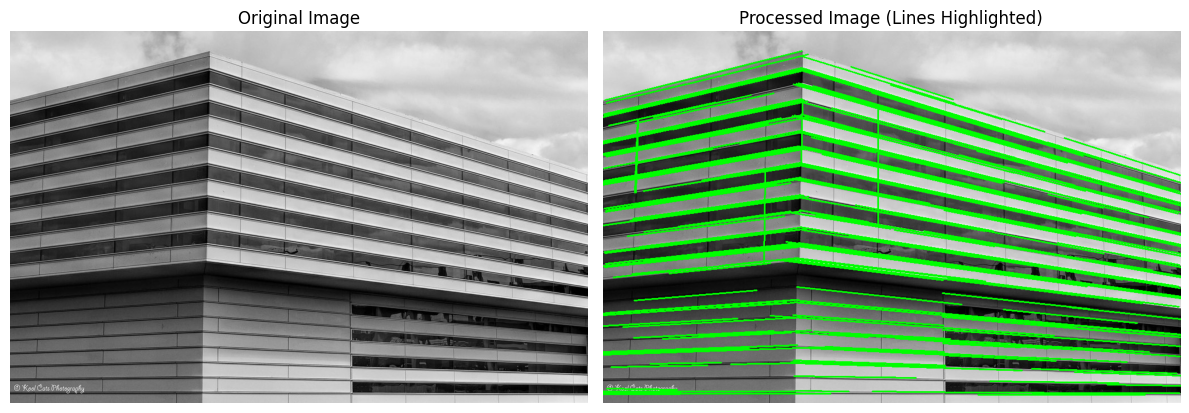

In [52]:
image_path = '../images/2.jpg' 
original, processed = detect_lines_hough(image_path)

titles = ['Original Image', 'Processed Image (Lines Highlighted)']
images = [original, processed]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


**Experimenting with different thresholds**

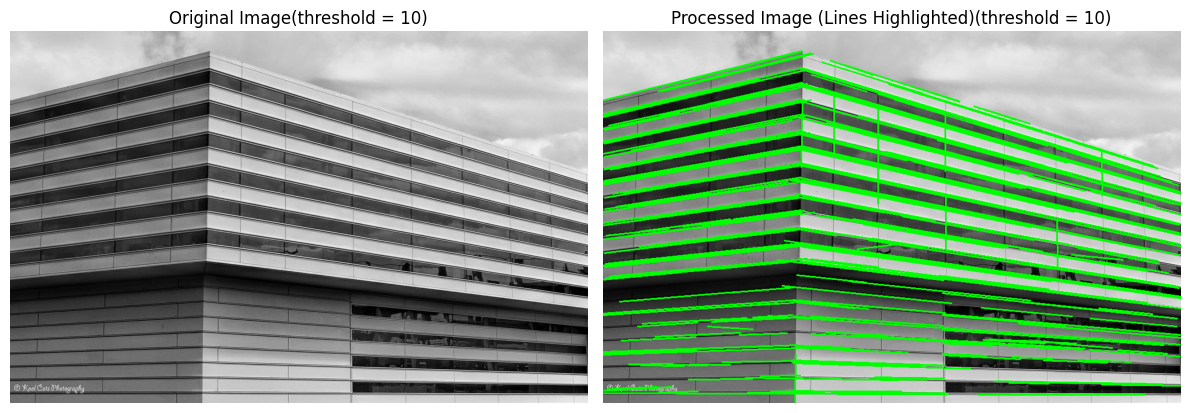

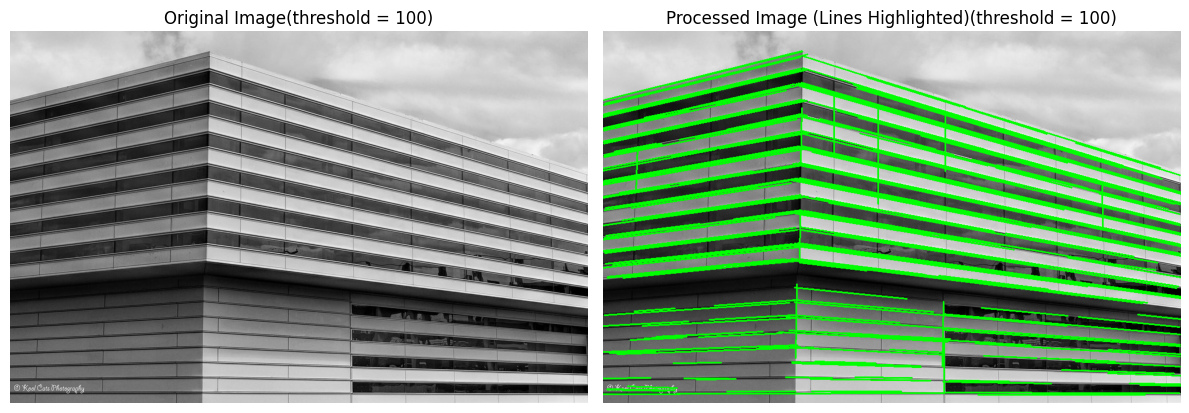

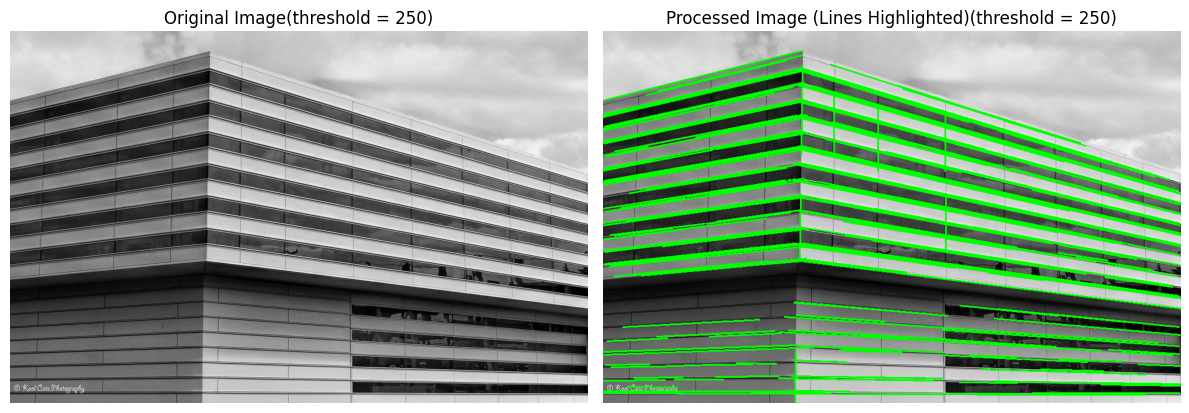

In [20]:
image_path = '../images/2.jpg' 
for canny_threshold1 in [10, 100, 250]:
    original, processed = detect_lines_hough(image_path, canny_threshold1=canny_threshold1)

    titles = ['Original Image', 'Processed Image (Lines Highlighted)']
    images = [original, processed]

    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(1, 2, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i] + "(threshold = " + str(canny_threshold1) + ")")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

**Best Result**

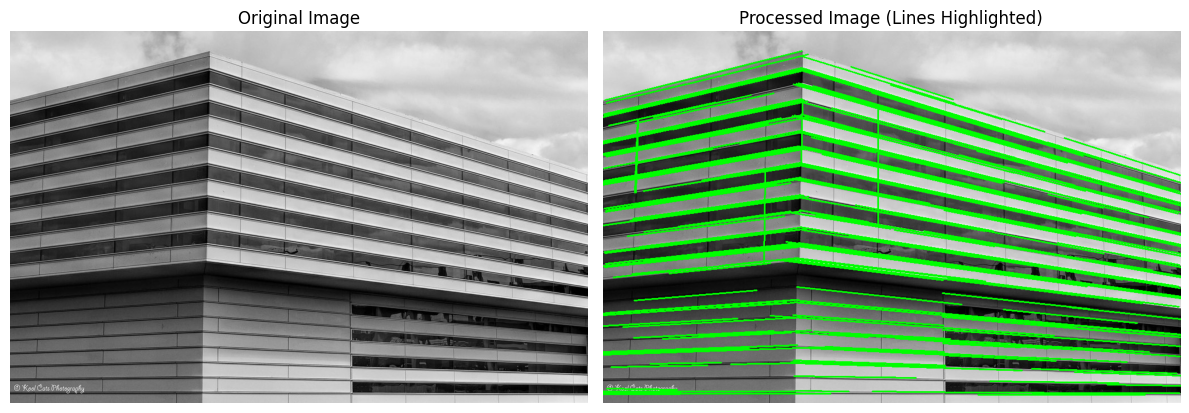

In [53]:
image_path = '../images/2.jpg' 
original, processed = detect_lines_hough(image_path)

titles = ['Original Image', 'Processed Image (Lines Highlighted)']
images = [original, processed]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


Reducing the hough_threshold from 100 to 50 increased the number of detected lines but also introduced some false positives. Increasing min_line_length from 50 to 100 resulted in only prominent lines being detected, which reduced noise but also missed smaller lines. Adjusting max_line_gap from 10 to 20 allowed more line segments to merge, improving line continuity. A combination of threshold=150, min_line_length=90, and max_line_gap=15 gave the best results on the tested image.

**Task 3**

In [92]:
def detect_circles_hough(image_path, dp=1.2, min_dist=50, param1=100, param2=30, min_radius=0, max_radius=0):
   
    original_image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 2)

    circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, dp=dp, minDist=min_dist,
                               param1=param1, param2=param2, minRadius=min_radius, maxRadius=max_radius)


    circles_image = original_image.copy()
    # print(circles)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            x, y, radius = circle
            cv2.circle(circles_image, (x, y), radius, (0, 255, 0), 2)
            # to draw center
            cv2.circle(circles_image, (x, y), 2, (0, 0, 255), 3)

    return original_image, circles_image


**Experimenting with different parameters**

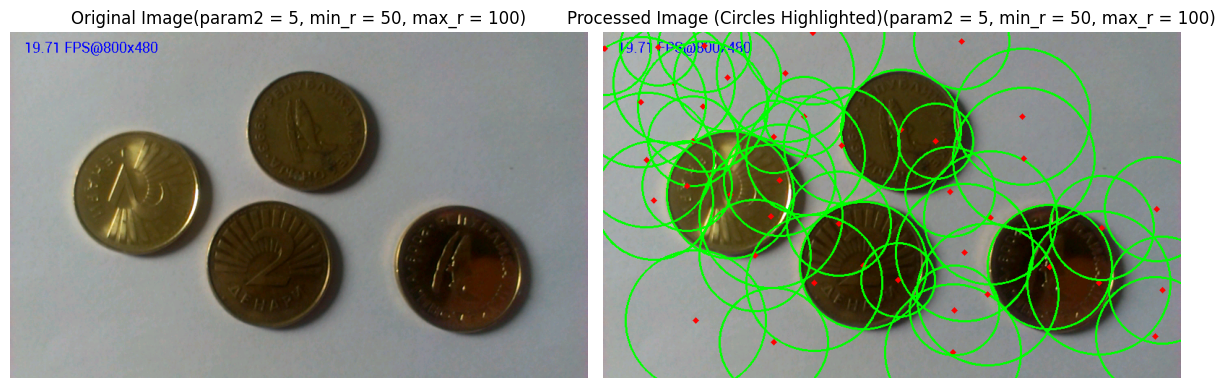

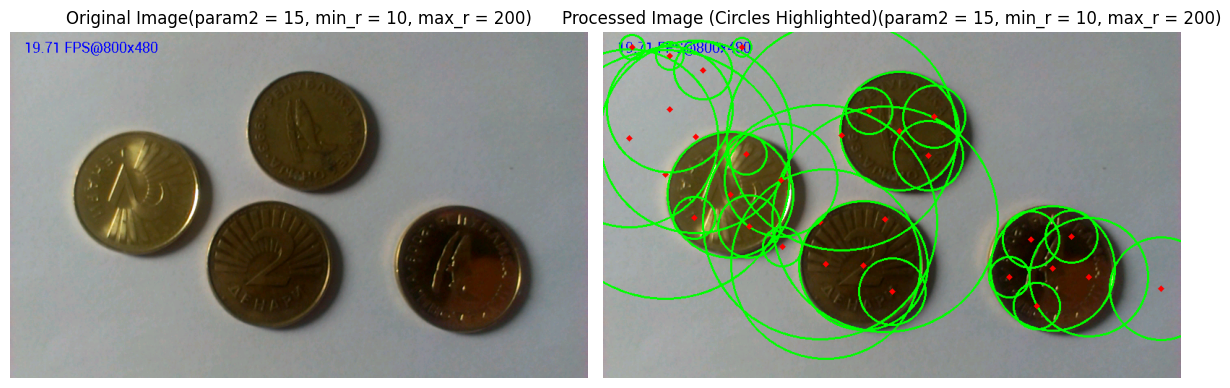

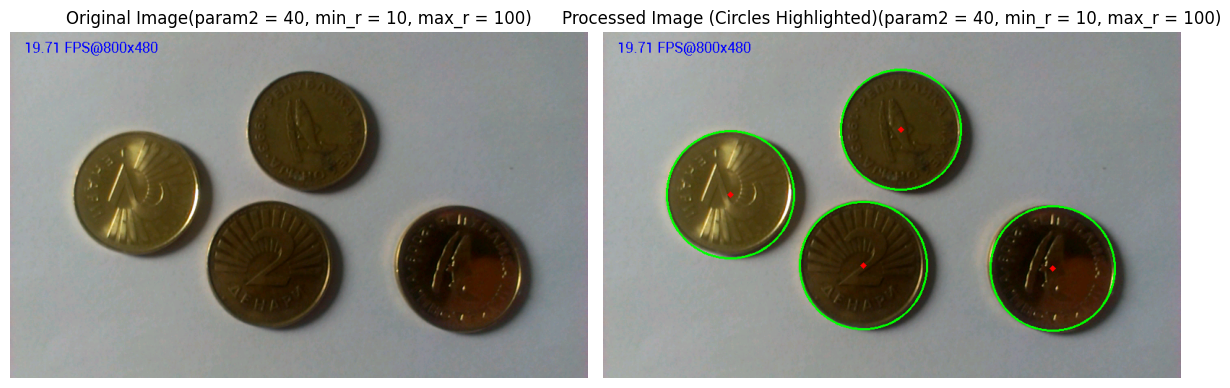

In [89]:
image_path = '../images/3.png'

for param2,radius_range in zip([5, 15, 40], [[50, 100], [10, 200], [10, 100]]):
    min_radius, max_radius = radius_range
    original, processed = detect_circles_hough(image_path, dp=1, min_dist=50, param1=100, param2=param2, min_radius=min_radius, max_radius=max_radius)

    titles = ['Original Image', 'Processed Image (Circles Highlighted)']
    images = [original, processed]

    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(1, 2, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i]+"(param2 = " + str(param2) + ", min_r = " + str(min_radius) + ", max_r = " + str(max_radius) + ")")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

**Best Result**

[[[409.80002  137.40001   82.119995]
  [360.6      323.40002   88.72    ]
  [173.40001  225.00002   85.36    ]
  [618.60004  327.        85.96    ]]]


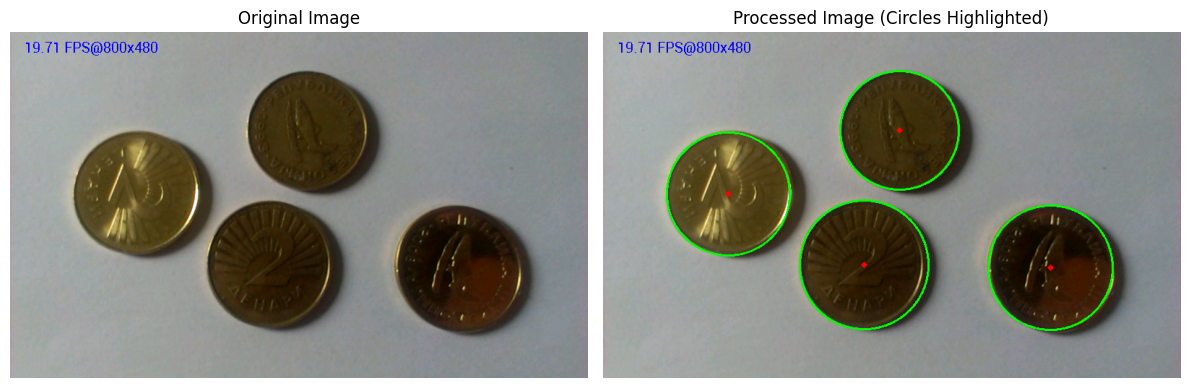

In [74]:
image_path = '../images/3.png'
original, processed = detect_circles_hough(image_path, dp=1.2, min_dist=50, param1=100, param2=30, min_radius=40, max_radius=100)

titles = ['Original Image', 'Processed Image (Circles Highlighted)']
images = [original, processed]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


Reducing accumulator threshold increased the number of detected circles but also introduces false positives. Adjusting the radius range to [40, 100] helps focus on relevant circles. Increasing min_dist from 50 to 80 reduced overlapping circles but missed closely packed objects. By setting dp=1.2, param2=30, and min_dist=50, min_radius=40 and max_radius=100, the function achieved the best results."

**Task 4**

In [95]:
def harris_corner_detection(image_path, block_size=2, ksize=3, k=0.04, threshold=0.01):
    original_image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    
    gray_float = np.float32(gray_image)
    
    harris_response = cv2.cornerHarris(gray_float, block_size, ksize, k)
    
    # Normalize and threshold the response
    harris_response = cv2.dilate(harris_response, None)
    corners_marked = original_image.copy()

    # marking corners
    corners_marked[harris_response > threshold * harris_response.max()] = [0, 255, 0]
    
    return original_image, corners_marked


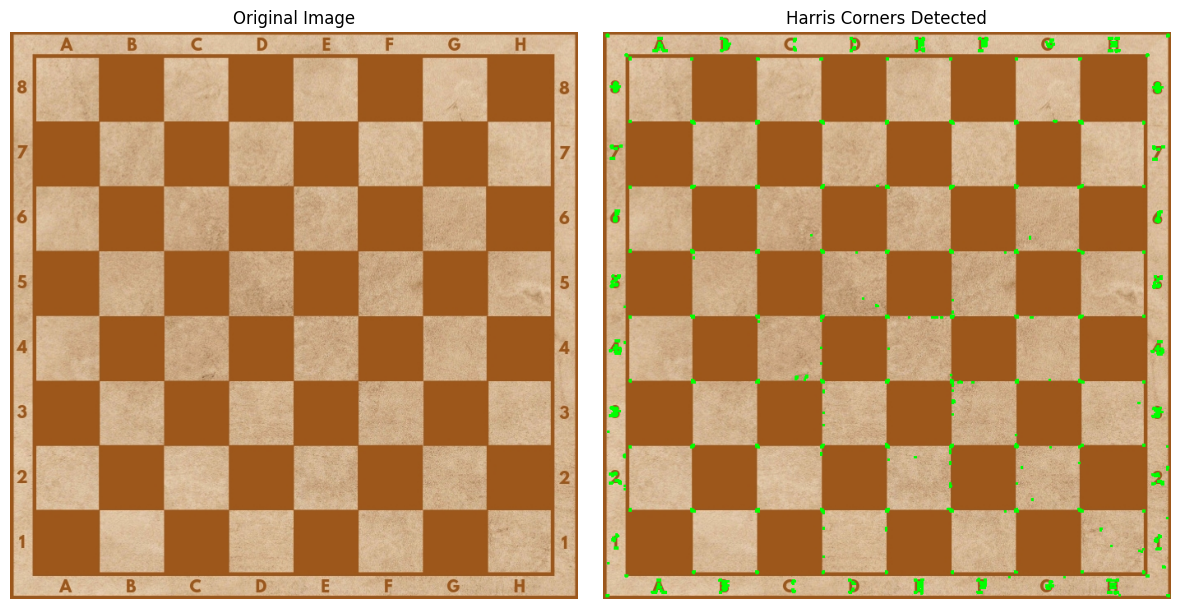

In [96]:
image_path = '../images/4.jpg'

original, corners = harris_corner_detection(image_path)

titles = ['Original Image', 'Harris Corners Detected']
images = [original, corners]

plt.figure(figsize=(12, 6))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


**Experimenting with varying sensitivity**

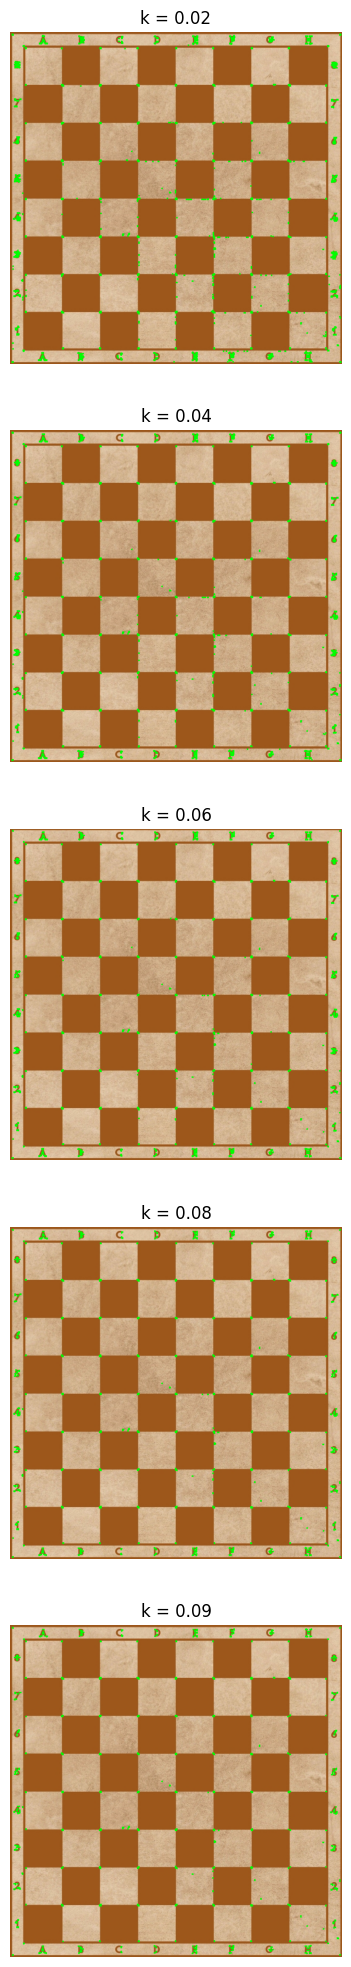

In [102]:
sensitivity_values = [0.02, 0.04, 0.06,0.08,0.09]
fig, ax = plt.subplots(5, 1, figsize=(25, 25))
for k in sensitivity_values:
    _, corners = harris_corner_detection(image_path, k=k)
    
    ax[sensitivity_values.index(k)].imshow(cv2.cvtColor(corners, cv2.COLOR_BGR2RGB))
    ax[sensitivity_values.index(k)].set_title(f"k = {k}")
    ax[sensitivity_values.index(k)].axis('off')
    


**Best Result**

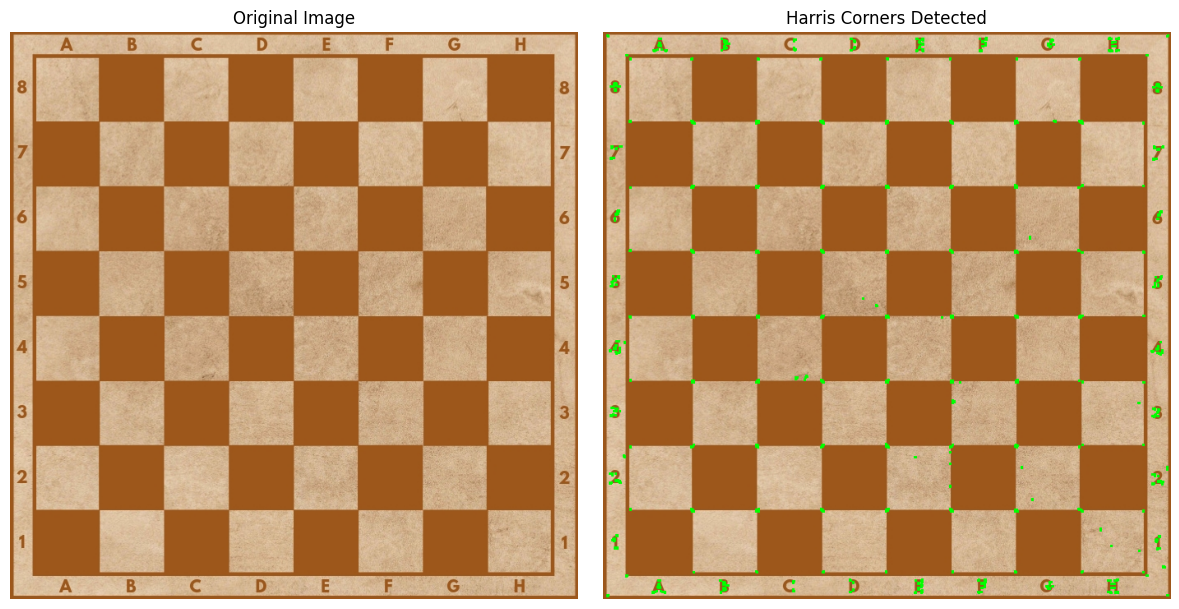

In [107]:
image_path = '../images/4.jpg'

original, corners = harris_corner_detection(image_path,k=0.09)

titles = ['Original Image', 'Harris Corners Detected']
images = [original, corners]

plt.figure(figsize=(12, 6))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Varying sensitivity:

- Lower k : detects more corners but may also false positives(noise).
- Higher k : detects only strong corners, reducing false positives, but may results in undetecting some corners.

Best result is obtained with k=0.09

**Task 5**

They differ in the parameter space and the computational complexity. For lines, hough transform maps each point in the input image to a 2D parameter space (p, theta), where p is the perpendicular distance from the origin to the line and theta is the angle of the line. Intersection in the parameter space shows the presence of a line. For circles, hough transform maps each point in the input image to 3D parameter space (x,y,r), where (x,y) is the center of the circle and r is the radius. Intrsection in the parameter space shows the presence of a circle.

As parameter space of circles is 3D and lines are 2D, computational complexity and memory usage of hough transform for circles is higher than lines.